<a href="https://colab.research.google.com/github/sobhanshukueian/Twitter-Text-Classification-Using-ML/blob/main/twitter_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dependencies

In [ ]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Read Data

In [ ]:
f = open("/content/drive/MyDrive/twitter data/train.txt")
y=[]
data_X=[]
for line in f.readlines():
    y.append(line[0])
    data_X.append(line[2:-1])

print(data_X[:20])
print(y[:20])

['The Da Vinci Code book is just awesome.', "this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.", 'i liked the Da Vinci Code a lot.', 'i liked the Da Vinci Code a lot.', "I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.", "that's not even an exaggeration ) and at midnight we went to Wal-Mart to buy the Da Vinci Code, which is amazing of course.", 'I loved the Da Vinci Code, but now I want something better and different!..', 'i thought da vinci code was great, same with kite runner.', 'The Da Vinci Code is actually a good movie...', 'I thought the Da Vinci Code was a pretty good book.', 'The Da Vinci Code is one of the most beautiful movies ive ever seen.', 'The Da Vinci Code is an * amazing * book, do not get me wrong.', 'then I turn on the light and the radio and enjoy my Da Vinci Code.', 'The Da Vinci Code was REALLY good.', 'i love da vinci code....', 'i loved da vinci code..', 'TO NIGH

In [ ]:
data={"tweet":data_X, "label":y}
df = pd.DataFrame(data)

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   7086 non-null   object
 1   label   7086 non-null   object
dtypes: object(2)
memory usage: 110.8+ KB


# plot data

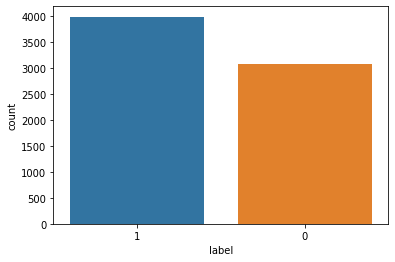

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df);

## plot word cloud

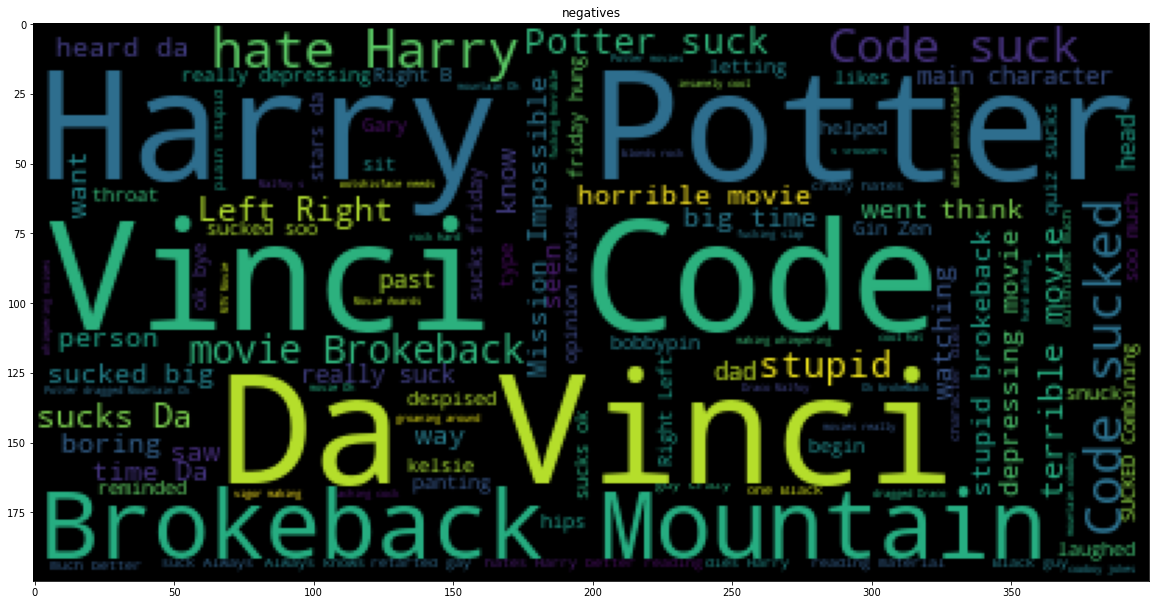

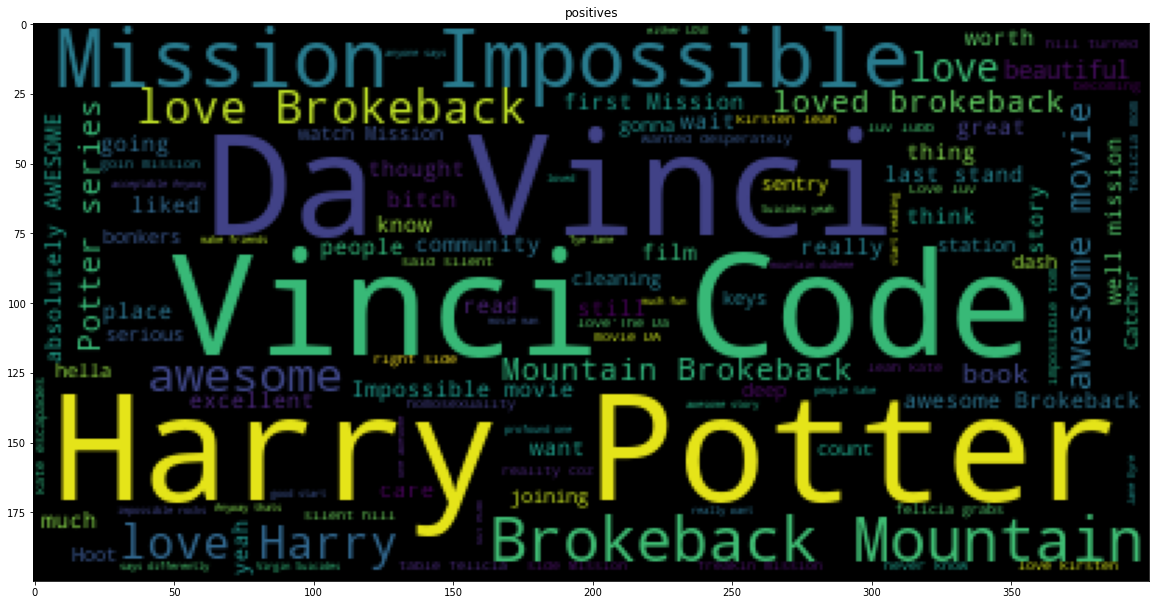

In [ ]:
from wordcloud import WordCloud 

def plot_sentences_cloud(sentences, title):
    plt.figure(figsize=(20,20))
    plt.imshow(WordCloud().generate(sentences))
    plt.title(title)

# visualize negative cloud, convert negative tweets to a list
negatives = " ".join(df[df.label == "0"]['tweet'].tolist())
positives = " ".join(df[df.label == "1"]['tweet'].tolist())

plot_sentences_cloud(negatives, "negatives")
plot_sentences_cloud(positives, "positives")

## words count

In [ ]:
def plot_words_count_hist(word_counts_dict, title, size):
    counts = pd.DataFrame.from_dict(word_counts_dict, orient='index')
    counts = counts.sort_values(by=counts.columns[0], ascending=False)
    cnt1 = counts.head(size).sort_values(by=counts.columns[0], ascending=True)
    cnt1.plot(kind='barh')
    plt.title(title)
    plt.rcParams["figure.figsize"] = [16,9]
    plt.ylabel('Word')
    plt.xlabel('Number of Occurences')

[('i', 4559), ('the', 3221), ('and', 2148), ('harry', 2088), ('vinci', 2001), ('da', 1998), ('brokeback', 1996), ('code', 1628), ('love', 1540), ('is', 1512)]


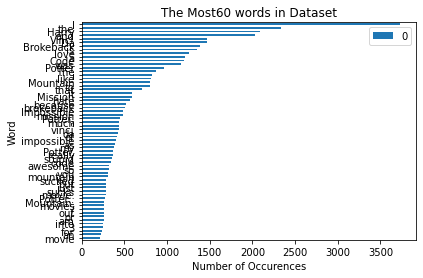

In [ ]:
import collections

all_words = []
all_words_dict = {}
for line in list(df['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        all_words_dict[word] = all_words_dict.get(word, 0) + 1 
    
print(collections.Counter(all_words).most_common(10))
plot_words_count_hist(all_words_dict, "The Most60 words in Dataset", 60)

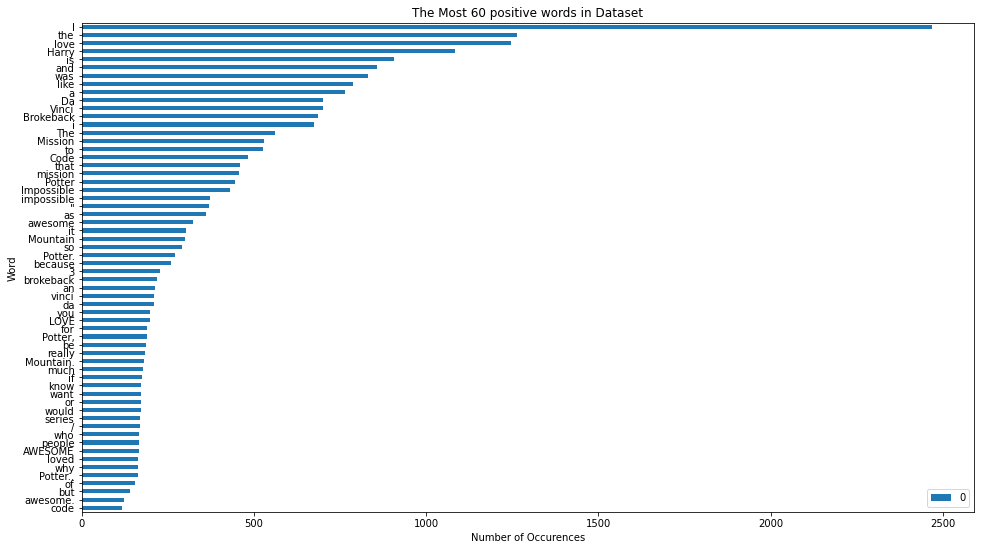

In [ ]:
positives = df[df.label == '1']['tweet'].tolist()
word_counts = {}
for line in positives:
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1

plot_words_count_hist(word_counts, "The Most 60 positive words in Dataset", 60)

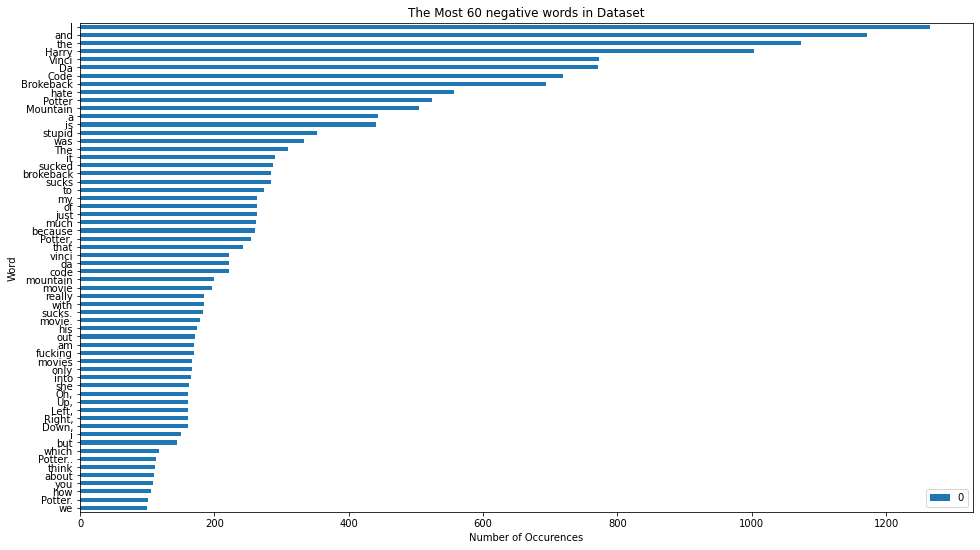

In [ ]:
negatives = df[df.label == '0']['tweet'].tolist()
word_counts = {}
for line in negatives:
  # Split the tweets into words
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1

plot_words_count_hist(word_counts, "The Most 60 negative words in Dataset", 60)

# Clean Data


In [ ]:
import string
stopwords_list = stopwords.words('english')
stopwords_list+=string.punctuation
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def clean_data(message):
    message=message.lower()
    Test_punc_removed=''.join([char for char in message if char not in string.punctuation])
    Test_punc_removed_join_clean=[word for word in Test_punc_removed.split() if word not in stopwords_list]
    return Test_punc_removed_join_clean

In [ ]:
df['tweet'] = [" ".join(x) for x in df['tweet'].apply(clean_data)]
df.head(), df.tail()

(                                               tweet label
 0                         da vinci code book awesome     1
 1  first clive cussler ive ever read even books l...     1
 2                            liked da vinci code lot     1
 3                            liked da vinci code lot     1
 4      liked da vinci code ultimatly didnt seem hold     1,
                                                   tweet label
 7081                          brokeback mountain boring     0
 7082               brokeback mountain really depressing     0
 7083  sit watching mtv movie awards reminded much de...     0
 7084               ok brokeback mountain horrible movie     0
 7085               oh brokeback mountain terrible movie     0)

# plot data

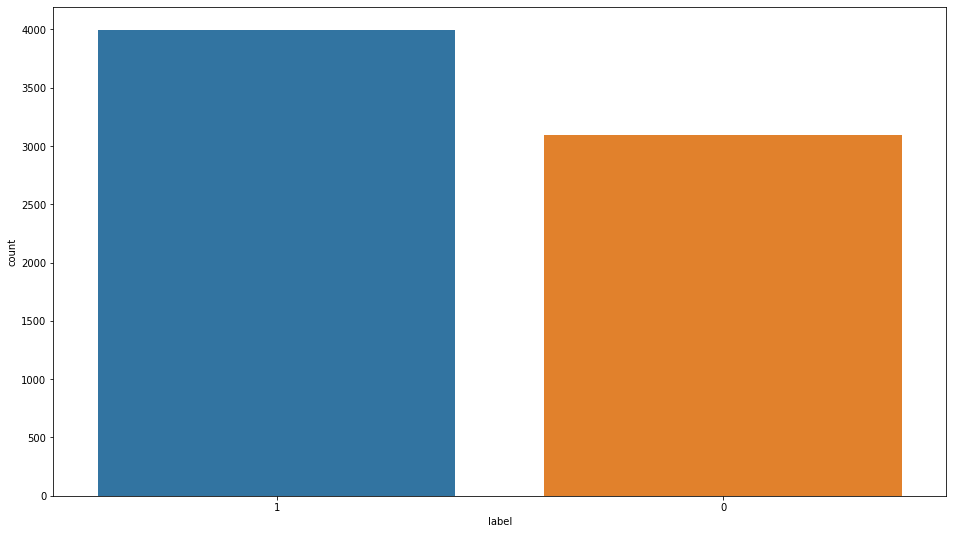

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df);

## plot word cloud

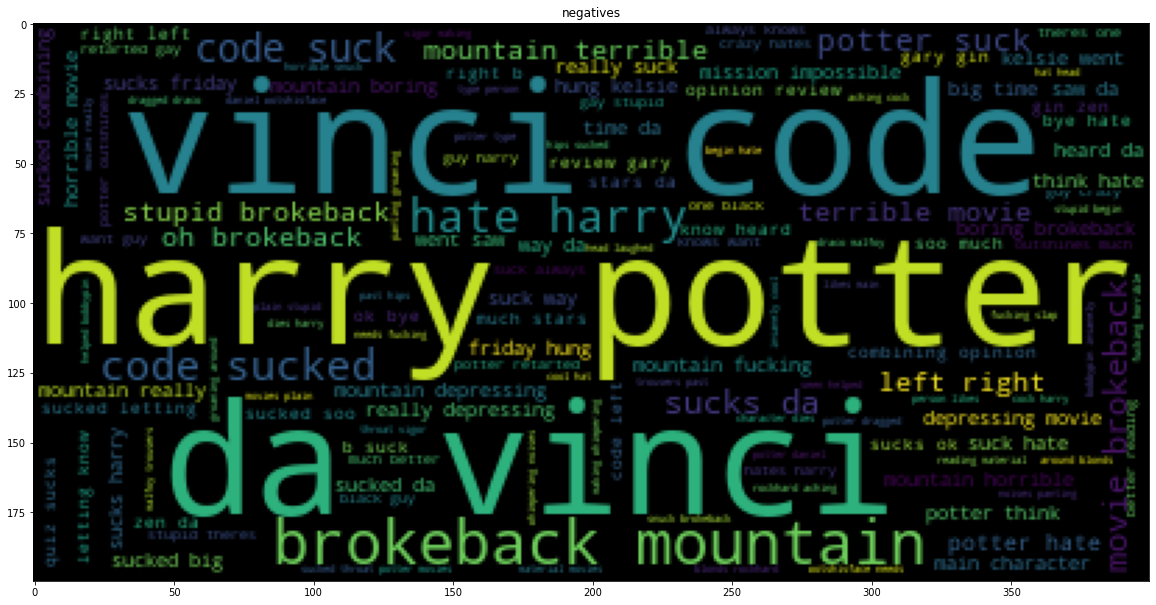

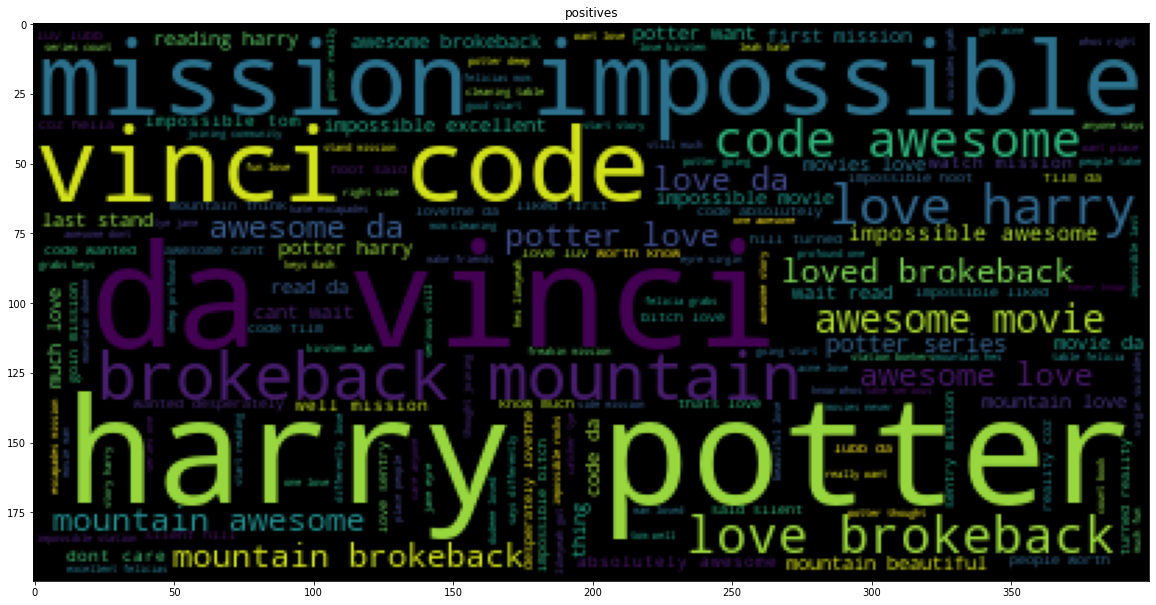

In [ ]:
from wordcloud import WordCloud 

def plot_sentences_cloud(sentences, title):
    plt.figure(figsize=(20,20))
    plt.imshow(WordCloud().generate(sentences))
    plt.title(title)

# visualize negative cloud, convert negative tweets to a list
negatives = " ".join(df[df.label == "0"]['tweet'].tolist())
positives = " ".join(df[df.label == "1"]['tweet'].tolist())

plot_sentences_cloud(negatives, "negatives")
plot_sentences_cloud(positives, "positives")

## words count

In [ ]:
def plot_words_count_hist(word_counts_dict, title, size):
    counts = pd.DataFrame.from_dict(word_counts_dict, orient='index')
    counts = counts.sort_values(by=counts.columns[0], ascending=False)
    cnt1 = counts.head(size).sort_values(by=counts.columns[0], ascending=True)
    cnt1.plot(kind='barh')
    plt.title(title)
    plt.rcParams["figure.figsize"] = [16,9]
    plt.ylabel('Word')
    plt.xlabel('Number of Occurences')

[('potter', 2091), ('harry', 2088), ('vinci', 2001), ('da', 1998), ('brokeback', 1996), ('mountain', 1994), ('code', 1992), ('love', 1542), ('awesome', 1125), ('impossible', 1091)]


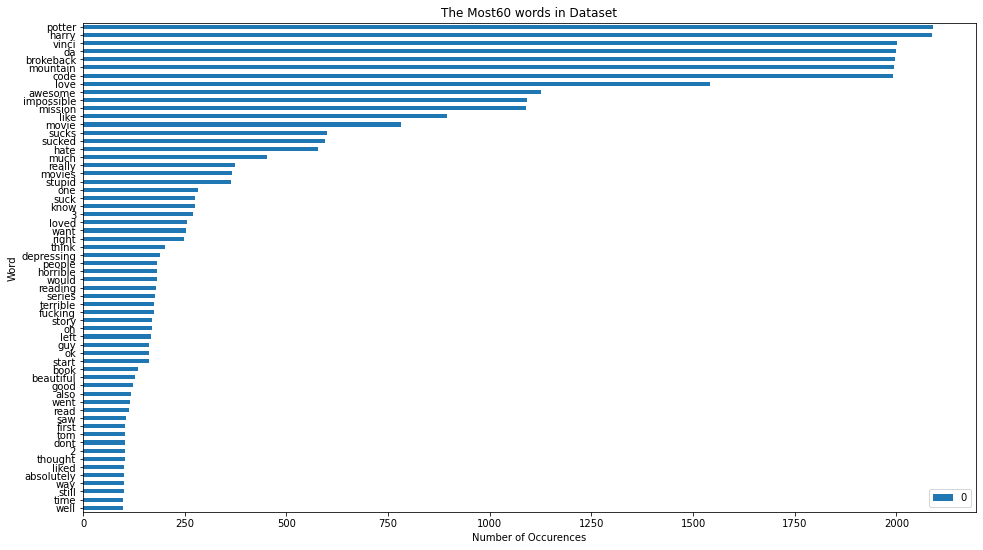

In [ ]:
import collections

all_words = []
all_words_dict = {}
for line in list(df['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        all_words_dict[word] = all_words_dict.get(word, 0) + 1 
    
print(collections.Counter(all_words).most_common(10))
plot_words_count_hist(all_words_dict, "The Most60 words in Dataset", 60)

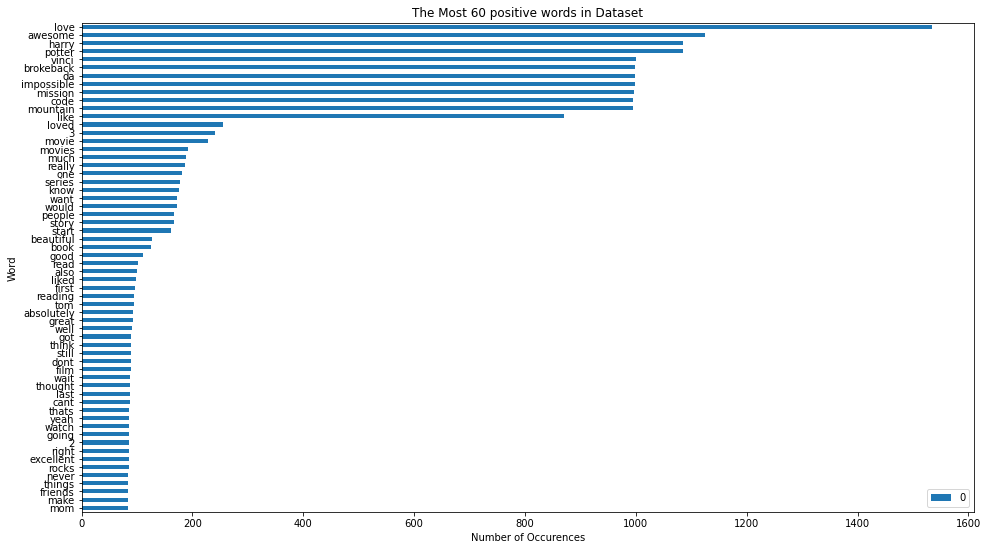

In [ ]:
positives = df[df.label == '1']['tweet'].tolist()
word_counts = {}
for line in positives:
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1

plot_words_count_hist(word_counts, "The Most 60 positive words in Dataset", 60)

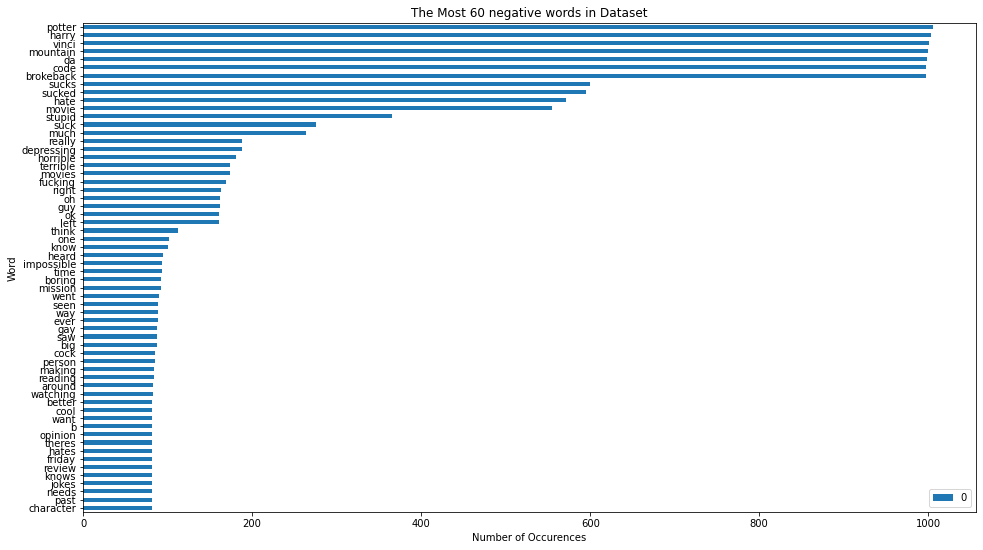

In [ ]:
negatives = df[df.label == '0']['tweet'].tolist()
word_counts = {}
for line in negatives:
  # Split the tweets into words
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1

plot_words_count_hist(word_counts, "The Most 60 negative words in Dataset", 60)

# Fit Models


## SVM

In [ ]:
X = df['tweet']
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.40,
                                                    random_state=123,shuffle=True)

In [ ]:
print(y_test.value_counts(), "\n-----------\n", y_train.value_counts())

1    1598
0    1237
Name: label, dtype: int64 
-----------
 1    2397
0    1854
Name: label, dtype: int64


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from nltk import TweetTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
tokenizer = TweetTokenizer(preserve_case=False)

In [ ]:
svm = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                                 tokenizer=tokenizer.tokenize)),
                     ('clf', svm.SVC(class_weight='balanced'))])

svm.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f4baf28be80>>)),
                ('clf', SVC(class_weight='balanced'))])

In [ ]:
# prediction
y_predict = svm.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))
svm_acc = metrics.accuracy_score(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1237
           1       0.99      0.99      0.99      1598

    accuracy                           0.99      2835
   macro avg       0.99      0.99      0.99      2835
weighted avg       0.99      0.99      0.99      2835



## SGD


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                                tokenizer=tokenizer.tokenize)),
                     ('clf', SGDClassifier())])
sgd.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f4baf28be80>>)),
                ('clf', SGDClassifier())])

In [ ]:
y_predict = sgd.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))
sgd_acc = metrics.accuracy_score(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1237
           1       0.99      0.99      0.99      1598

    accuracy                           0.99      2835
   macro avg       0.99      0.99      0.99      2835
weighted avg       0.99      0.99      0.99      2835



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                                tokenizer=tokenizer.tokenize)),
                     ('clf', RandomForestClassifier())])
# Fit Training Dataset.
random_forest.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f4baf28be80>>)),
                ('clf', RandomForestClassifier())])

In [ ]:
y_predict = random_forest.predict(X_test)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))
random_forest = metrics.accuracy_score(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1237
           1       0.99      0.99      0.99      1598

    accuracy                           0.99      2835
   macro avg       0.99      0.99      0.99      2835
weighted avg       0.99      0.99      0.99      2835



# Test On other Data


In [ ]:
import chardet
with open("/content/drive/MyDrive/twitter data/train2.txt", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
f = open("/content/drive/MyDrive/twitter data/train2.txt", encoding='Windows-1252')
test_X=[]
for line in f.readlines():
    test_X.append(line[:-1])

print(test_X[:20])

['" I don\'t care what anyone says, I like Hillary Clinton.', 'have an awesome time at purdue!..', "Yep, I'm still in London, which is pretty awesome: P Remind me to post the million and one pictures that I took when I get back to Markham!...", "Have to say, I hate Paris Hilton's behavior but I do think she's kinda cute..", 'i will love the lakers.', "I'm so glad I love Paris Hilton, too, or this would be excruciating.", 'considering most Geico commericals are stupid...', 'i liked MIT though, esp their little info book(', 'Before I left Missouri, I thought London was going to be so good and cool and fun and a really great experience and I was really excited.', 'I still like Tom Cruise.', 'well, i had a piece of crap toyota celica but it died in portland and i got a ford ranger..', 'i love angelina jolie.', 'I still like Tom Cruise.', 'UCLA is beautiful.', 'I think Angelina Jolie is so much more beautiful than Jennifer Anniston, who, by the way, is majorly OVERRATED.', 'Angelina Jolie i

In [ ]:
sgd_predict = sgd.predict(test_X)
svm_predict = svm.predict(test_X)
random_forest_predict = random_forest.predict(test_X)

In [ ]:
data={"Test tweets": test_X, "SGD Labels": sgd_predict, "SVM Labels": svm_predict, "Random Forest Labels": random_forest_predict}
test_df = pd.DataFrame(data=data)

In [ ]:
test_df

,Test tweets,SGD Labels,SVM Labels,Random Forest Labels
0,""" I don't care what anyone says, I like Hillar...",1,1,1
1,have an awesome time at purdue!..,1,1,1
2,"Yep, I'm still in London, which is pretty awes...",1,1,1
3,"Have to say, I hate Paris Hilton's behavior bu...",0,0,0
4,i will love the lakers.,1,1,1
...,...,...,...,...
33048,"well, i had a piece of crap toyota celica but ...",0,0,1
33049,But I miss Boston.,1,1,1
33050,i love paris hilton..,1,1,1
33051,I was rejected by the stupid San Francisco lit...,0,0,0
